# Proyek Analisis Data: Air Quality Dataset 
- **Nama:** Septi Isdayanna
- **Email:** septiisdaynnaa@gmail.com
- **ID Dicoding:** septi_isdayanna

## Menentukan Pertanyaan Bisnis

1. Bagaimana tingkat rata-rata konsentrasi karbon monoksida (CO) di Stasiun Tiantan dari tahun 2013 hingga 2017?
2. Apa saja variabel polusi yang mempengaruhi atau yang memiliki hubungan dengan tingkat konsentrasi karbon monoksida (CO) di Stasiun Tiantan?
3. Bagimana perbandingan peningkatan konsentrasi karbon monoksida (CO) dengan variabel yang memiliki tingkat korelasi paling tinggi dengan karbon monoksida (CO) disetiap bulannya, pada tahun dimana rata-rata karbon monoksida (CO) mencapai tingkat paling tinggi di Stasiun Tiantan?
4. Apakah faktor cuaca seperti  arah angin dan musim mempengaruhi tingkatan polusi di Stasiun Tiantan dari tahun 2013 hingga 2017?
5. Apakah perbedaan waktu mempengaruhi tingkat konsentrasi polusi?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
# menggunakan method read_csv pada pandas untuk membaca file csv, kemudian menyimpannya ke dalam variabel tiantan_df
tiantan_df = pd.read_csv("data/PRSA_Data_Tiantan_20130301-20170228.csv")
tiantan_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


**Insight:**
- Dari hasil gathering data kualitas udara pada stasiun Tiantan, terdapat 18 variabel dalam dataset tersebut, yaitu mencakup informasi waktu (tahun, bulan, hari, jam), polutan udara (PM2.5, PM10, SO2, NO2, CO, O3), serta faktor cuaca (temperatur, tekanan udara, kelembaban, hujan, arah angin, dan kecepatan angin).

### Assessing Data

##### Mengidentifikasi Invalid Value

In [5]:
tiantan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34387 non-null  float64
 6   PM10     34467 non-null  float64
 7   SO2      33946 non-null  float64
 8   NO2      34320 non-null  float64
 9   CO       33938 non-null  float64
 10  O3       34221 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


##### Mengidentifikasi Missing Value

In [6]:
tiantan_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       677
PM10        597
SO2        1118
NO2         744
CO         1126
O3          843
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

##### Mengidentifikasi Duplicate Data

In [3]:
print("Jumlah duplikasi: ", tiantan_df.duplicated().sum())

Jumlah duplikasi:  0


##### Mengidentifikasi Inaccurate Value

In [8]:
tiantan_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34387.000000,34467.000000,33946.000000,34320.000000,33938.000000,34221.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.164911,106.363672,14.367615,53.162646,1298.303318,55.984297,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.921384,89.700157,20.144631,31.946224,1170.593297,59.081528,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.571200,2.000000,100.000000,0.428400,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,41.000000,3.000000,28.000000,500.000000,8.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,85.000000,7.000000,47.000000,900.000000,40.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,113.000000,144.000000,17.000000,71.000000,1600.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,821.000000,988.000000,273.000000,241.000000,10000.000000,674.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


##### Mengidentifikasi Inconsistent Value

In [22]:
print(tiantan_df['wd'].unique()) 

['NNW' 'NW' 'N' 'W' 'ENE' 'NE' 'E' 'NNE' 'SW' 'SSW' 'S' 'WSW' 'ESE' 'SE'
 'WNW' 'SSE' nan]


##### Mengidentifikasi Outlier menggunakan Box Plot

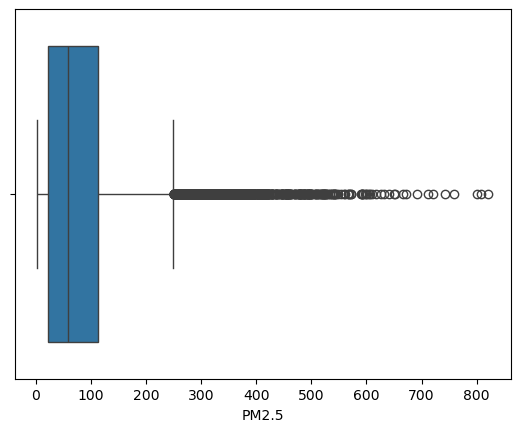

In [9]:
sns.boxplot(x=tiantan_df['PM2.5'])
plt.show()

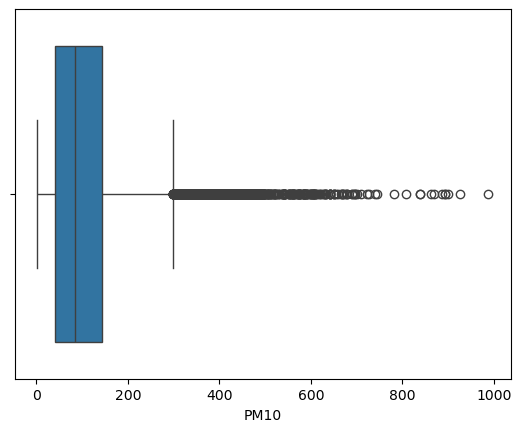

In [10]:
sns.boxplot(x=tiantan_df['PM10'])
plt.show()

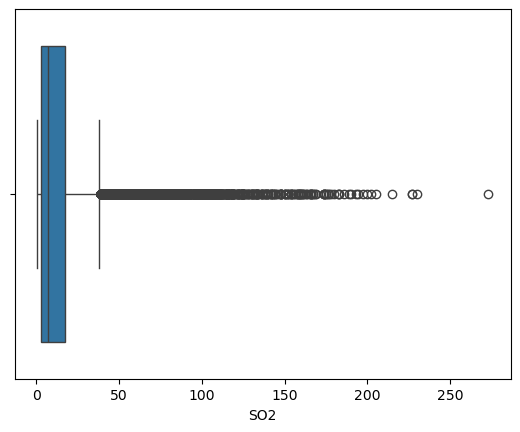

In [11]:
sns.boxplot(x=tiantan_df['SO2'])
plt.show()

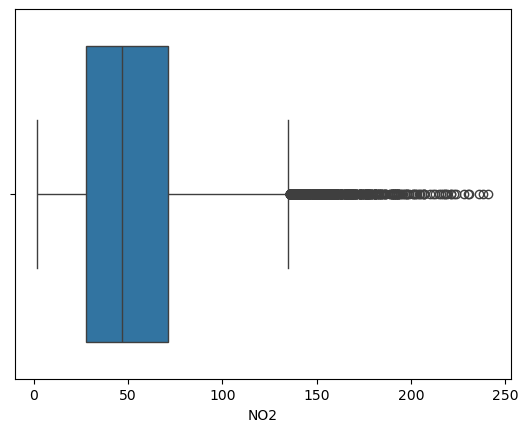

In [12]:
sns.boxplot(x=tiantan_df['NO2'])
plt.show()

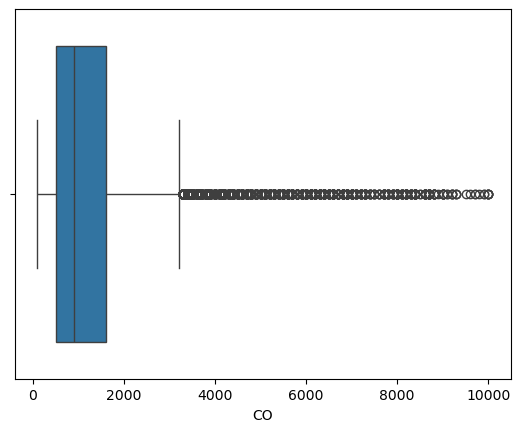

In [13]:
sns.boxplot(x=tiantan_df['CO'])
plt.show()

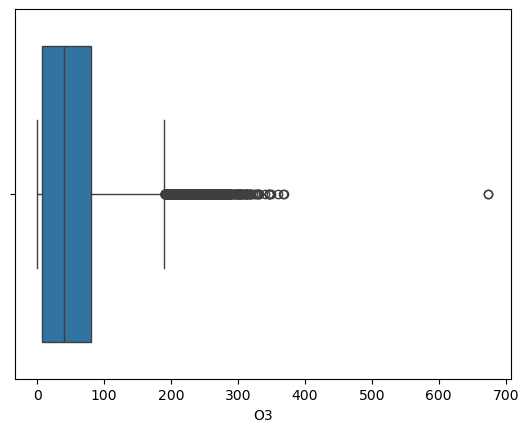

In [14]:
sns.boxplot(x=tiantan_df['O3'])
plt.show()

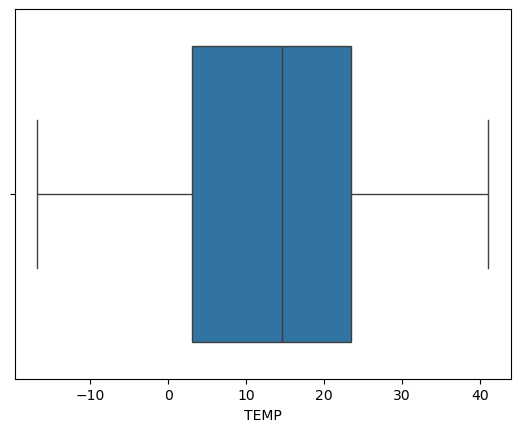

In [15]:
sns.boxplot(x=tiantan_df['TEMP'])
plt.show()

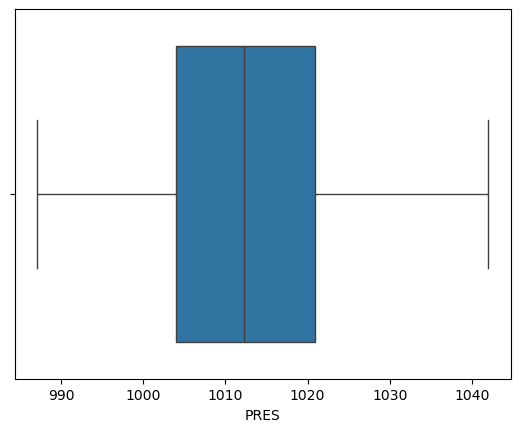

In [16]:
sns.boxplot(x=tiantan_df['PRES'])
plt.show()

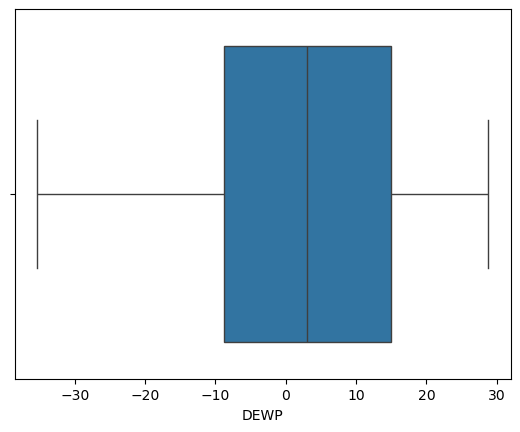

In [17]:
sns.boxplot(x=tiantan_df['DEWP'])
plt.show()

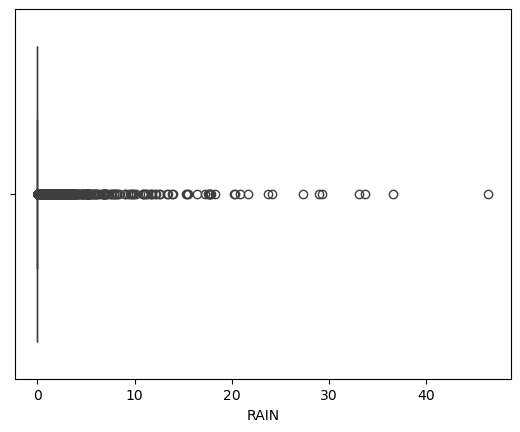

In [19]:
sns.boxplot(x=tiantan_df['RAIN'])
plt.show()

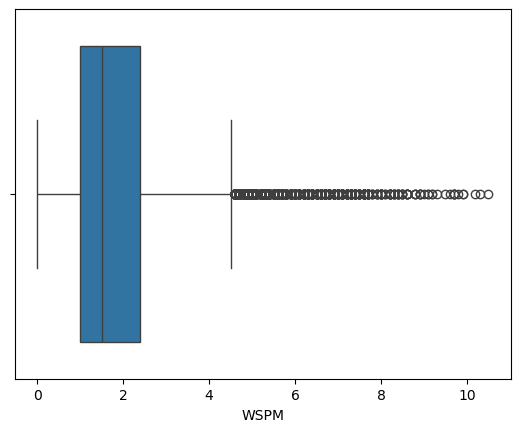

In [20]:
sns.boxplot(x=tiantan_df['WSPM'])
plt.show()

**Insight:**
- Tidak ada masalah dengan tipe data dari seluruh kolom tersebut
- Tidak terdapat duplikat data pada data dari seluruh kolom tersebut
- Value pada kolom wd yang beritpe object semuanya konsisten
- Terdapat perbedaan pada jumlah data pada kolom PM2.5, PM10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, dan WSPM. Dimana nilai jumlah dari seluruh kolom tersebut kurang dari 35064. Hal ini menunjukkan adanya missing values
- Terdapat keanehan pada nilai maksimum yang terdapat pada kolom RAIN, dimana data pada kolom tersebut memiliki nilai maksimum 46.4, yang sangat tinggi dibandingkan dengan rata-rata 0.06 dan standar deviasi yaitu 0.78
- Terdapat banyak sekali outlier pada kolom PM2.5, PM10, SO2, NO2, CO, O3, RAIN, dan WSPM. Namun terlihat juga outlier yang paling jauh dari pola dimiliki oleh kolom PM2.5, PM10, SO2, O3, dan RAIN.

### Cleaning Data

##### Missing Value

***Tahap Define***

Karena data dalam dataset ini berbentuk time series (data yang disusun berdasarkan urutan waktu) 
maka metode yang cocok untuk mengatasi missing value adalah metode Interpolation. 
Namun metode ini merupakan salah satu pendekatan numerik, jadi untuk data yang bertipe object yang mengalami
missing value (kolom wd) menggunakan metode Forward Fill (ffill) yaitu mengisi missing value dengan nilai sebelumnya karena cocok untuk data time-series sehingga tetap konsisten.

***Tahap Code***

In [5]:
# Supaya semua tipe data numerik tidak dianggap sebagai object
tiantan_df = tiantan_df.infer_objects(copy=False)

# Membuat variabel baru untuk menyimpan kolom yang memiliki missing value
kolom_kosong = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

# Melakukan looping untuk mengisi missing values dengan metode interpolasi 
for i in kolom_kosong:
    tiantan_df[i] = tiantan_df[i].interpolate(method='linear', limit_direction='forward')

In [6]:
# Menggunakan metode ffill yang akan mengisi data dengan nilai sebelumnya
tiantan_df['wd'] = tiantan_df['wd'].ffill()

***Tahap Test***

In [7]:
# Menghitung ulang untuk mengecek apakah masih ada missing value
tiantan_df.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

##### inaccurate Value dan Outlier

***Tahap Define***

Dari hasil Box Plot diatas terlihat banyak outlier dari beberapa kolom, namun disini saya akan tetap membiarkan hal tersebut karena merupakan bagian dari pola alami data (ada lonjakan tertentu).
Namun terdapat beberapa kolom yang memiliki outlier paling jauh, sehingga perlu mengganti value dibagian outlier tersebut menggunakan metode Imputation dengan nilai median.

***Tahap Code***

Kolom PM2.5

In [ ]:
# Menampilkan data yang lebih dari 700, karena pada hasil Box Plot outlier diatas value 700 hanya sedikit
tiantan_df[tiantan_df['PM2.5'] >= 700]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
25779,25780,2016,2,8,3,821.0,988.0,182.0,88.0,1900.0,3.0,-2.600,1008.8,-14.4,0.0,W,0.6,Tiantan
25780,25781,2016,2,8,4,801.0,927.0,136.0,83.0,2200.0,3.0,-2.500,1008.6,-14.6,0.0,ENE,1.1,Tiantan
25781,25782,2016,2,8,5,758.0,870.0,126.0,85.0,2800.0,3.0,-3.000,1008.2,-14.4,0.0,NE,0.7,Tiantan
25782,25783,2016,2,8,6,720.0,839.0,105.0,83.0,3100.0,3.0,-3.700,1008.0,-13.4,0.0,ENE,1.3,Tiantan
25783,25784,2016,2,8,7,712.0,807.0,94.0,81.0,3200.0,3.0,-3.900,1008.2,-13.8,0.0,SSW,1.0,Tiantan
34298,34299,2017,1,28,2,743.0,875.0,100.0,79.0,2500.0,2.0,-2.975,1020.0,-14.9,0.0,NE,1.4,Tiantan
34299,34300,2017,1,28,3,808.0,887.0,93.0,75.0,2900.0,2.0,-4.000,1019.5,-14.5,0.0,NE,1.5,Tiantan


In [8]:
# Dilakukan imputation dengan mengganti nilai yang lebih dari 700 dengan nilai median, sehingga nilai max 700
median_value = tiantan_df['PM2.5'].median()
tiantan_df['PM2.5'] = tiantan_df['PM2.5'].mask(tiantan_df['PM2.5'] >= 700, median_value)

Kolom PM10

In [9]:
# Menampilkan data yang lebih dari 800, karena pada hasil Box Plot outlier diatas value 800 hanya sedikit
tiantan_df[tiantan_df['PM10'] >= 800]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
205,206,2013,3,9,13,67.0,839.0,3.0,19.0,500.0,92.0,9.900,1008.5,-19.3,0.0,N,6.4,Tiantan
9732,9733,2014,4,10,12,82.0,894.0,21.0,30.0,900.0,62.0,17.000,1018.7,-0.3,0.0,S,2.0,Tiantan
18182,18183,2015,3,28,14,84.0,887.0,3.0,20.0,300.0,93.0,22.100,1007.5,-0.6,0.0,NW,4.0,Tiantan
25779,25780,2016,2,8,3,58.0,988.0,182.0,88.0,1900.0,3.0,-2.600,1008.8,-14.4,0.0,W,0.6,Tiantan
25780,25781,2016,2,8,4,58.0,927.0,136.0,83.0,2200.0,3.0,-2.500,1008.6,-14.6,0.0,ENE,1.1,Tiantan
25781,25782,2016,2,8,5,58.0,870.0,126.0,85.0,2800.0,3.0,-3.000,1008.2,-14.4,0.0,NE,0.7,Tiantan
25782,25783,2016,2,8,6,58.0,839.0,105.0,83.0,3100.0,3.0,-3.700,1008.0,-13.4,0.0,ENE,1.3,Tiantan
25783,25784,2016,2,8,7,58.0,807.0,94.0,81.0,3200.0,3.0,-3.900,1008.2,-13.8,0.0,SSW,1.0,Tiantan
26401,26402,2016,3,5,1,143.0,893.0,2.0,13.0,300.0,67.0,10.000,1015.2,-8.2,0.0,NW,3.7,Tiantan
34297,34298,2017,1,28,1,478.0,863.0,82.0,75.0,2100.0,2.0,-0.525,1020.0,-15.7,0.0,NW,0.8,Tiantan


In [10]:
# Dilakukan imputation dengan mengganti nilai yang lebih dari 800 dengan nilai median, sehingga nilai max 800
median_value = tiantan_df['PM10'].median()
tiantan_df['PM10'] = tiantan_df['PM10'].mask(tiantan_df['PM10'] >= 800, median_value)

Kolom SO2

In [16]:
# Menampilkan data yang lebih dari 200, karena pada hasil Box Plot outlier diatas value 200 hanya sedikit
tiantan_df[tiantan_df['SO2'] >= 200]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
7169,7170,2013,12,24,17,340.0,364.0,202.0,193.0,6100.0,2.0,-2.8,1027.6,-8.9,0.0,NE,0.6,Tiantan
7883,7884,2014,1,23,11,199.0,257.0,200.0,122.0,4600.0,3.0,1.2,1012.2,-13.0,0.0,NE,1.9,Tiantan
8816,8817,2014,3,3,8,195.0,209.0,230.0,105.0,6000.0,9.0,0.7,1019.0,-3.6,0.0,NE,1.3,Tiantan
10305,10306,2014,5,4,9,24.0,24.0,205.0,19.0,300.0,71.0,14.6,1013.3,-14.6,0.0,N,6.3,Tiantan
14533,14534,2014,10,27,13,30.4,30.4,273.0,24.0,800.0,54.0,15.1,1026.4,-5.4,0.0,SW,2.7,Tiantan
19297,19298,2015,5,14,1,50.0,312.0,215.0,21.0,200.0,77.0,21.3,998.0,1.0,0.0,N,5.3,Tiantan
19345,19346,2015,5,16,1,69.0,115.0,227.0,55.0,900.0,82.0,15.6,1009.1,8.8,0.0,WNW,0.5,Tiantan
19393,19394,2015,5,18,1,188.0,193.0,227.0,96.0,1600.0,22.0,20.7,993.8,19.0,0.0,E,1.4,Tiantan


In [11]:
# Dilakukan imputation dengan mengganti nilai yang lebih dari 200 dengan nilai median, sehingga nilai max 200
median_value = tiantan_df['SO2'].median()
tiantan_df['SO2'] = tiantan_df['SO2'].mask(tiantan_df['SO2'] >= 200, median_value)

Kolom O3

In [20]:
# Menampilkan data yang lebih dari 400, karena pada hasil Box Plot outlier diatas value 400 hanya sedikit
tiantan_df[tiantan_df['O3'] >= 400]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
929,930,2013,4,8,17,14.0,157.0,3.0,20.0,300.0,673.000000,10.4,1009.9,-15.2,0.0,WNW,7.0,Tiantan
930,931,2013,4,8,18,16.0,290.0,3.0,21.0,300.0,674.000000,9.6,1010.9,-15.1,0.0,WNW,5.6,Tiantan
931,932,2013,4,8,19,16.0,184.0,3.0,21.0,300.0,647.136364,9.2,1011.8,-15.4,0.0,WNW,5.5,Tiantan
932,933,2013,4,8,20,12.0,149.0,3.0,22.0,400.0,620.272727,8.7,1012.3,-13.7,0.0,NW,7.3,Tiantan
933,934,2013,4,8,21,15.0,100.0,3.0,24.0,300.0,593.409091,8.5,1012.5,-13.9,0.0,NW,8.5,Tiantan
934,935,2013,4,8,22,17.0,85.0,3.0,21.0,300.0,566.545455,7.8,1012.2,-12.6,0.0,W,6.8,Tiantan
935,936,2013,4,8,23,12.0,74.0,3.0,16.0,300.0,539.681818,7.3,1012.2,-12.0,0.0,WNW,4.1,Tiantan
936,937,2013,4,9,0,12.0,61.0,3.0,15.0,300.0,512.818182,7.0,1012.1,-11.2,0.0,WNW,7.6,Tiantan
937,938,2013,4,9,1,8.0,45.0,3.0,12.0,300.0,485.954545,6.6,1012.1,-10.7,0.0,NW,5.3,Tiantan
938,939,2013,4,9,2,4.0,35.0,3.0,11.0,300.0,459.090909,6.4,1012.3,-10.8,0.0,WNW,5.7,Tiantan


In [12]:
# Dilakukan imputation dengan mengganti nilai yang lebih dari 400 dengan nilai median, sehingga nilai max 400
median_value = tiantan_df['O3'].median()
tiantan_df['O3'] = tiantan_df['O3'].mask(tiantan_df['O3'] >= 400, median_value)

Kolom RAIN

In [28]:
# Menampilkan data yang lebih dari 20, karena pada hasil Box Plot outlier diatas value 20 hanya sedikit
tiantan_df[tiantan_df['RAIN'] >= 20]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
3097,3098,2013,7,8,1,218.0,265.0,16.0,15.0,1500.0,149.0,24.2,997.6,23.3,27.3,SSW,2.2,Tiantan
11323,11324,2014,6,15,19,81.0,81.0,15.0,58.0,1000.0,186.0,20.9,1000.6,17.9,20.8,E,4.3,Tiantan
11355,11356,2014,6,17,3,218.0,218.0,13.0,18.0,1000.0,119.0,18.1,998.8,17.1,29.0,SSE,1.6,Tiantan
20332,20333,2015,6,26,4,117.0,117.0,2.0,22.0,1000.0,106.0,20.3,995.8,19.5,33.7,E,1.8,Tiantan
20858,20859,2015,7,18,2,92.0,92.0,2.0,40.0,1300.0,57.0,20.5,1001.2,19.7,29.3,NNW,2.8,Tiantan
21093,21094,2015,7,27,21,64.0,64.0,2.0,20.0,800.0,144.0,22.9,1000.1,22.2,33.1,W,2.9,Tiantan
21356,21357,2015,8,7,20,51.0,51.0,2.0,27.0,700.0,138.0,19.7,1010.5,18.7,36.6,ENE,1.4,Tiantan
29698,29699,2016,7,20,10,31.0,31.0,2.0,19.0,800.0,46.0,21.7,998.1,21.0,23.7,NE,4.7,Tiantan
29699,29700,2016,7,20,11,33.0,33.0,2.0,13.0,700.0,48.0,21.7,996.7,21.0,24.1,NE,5.2,Tiantan
29700,29701,2016,7,20,12,22.0,22.0,2.0,10.0,600.0,50.0,21.7,996.0,20.9,20.3,ENE,5.8,Tiantan


In [13]:
# Dilakukan imputation dengan mengganti nilai yang lebih dari 20 dengan nilai median, sehingga nilai max 20
median_value = tiantan_df['RAIN'].median()
tiantan_df['RAIN'] = tiantan_df['RAIN'].mask(tiantan_df['RAIN'] >= 20, median_value)

***Tahap test***

max PM2.5 saat ini:  691.0


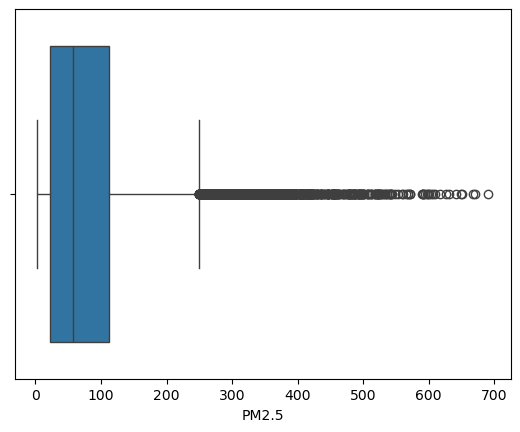

In [12]:
print("max PM2.5 saat ini: ", tiantan_df['PM2.5'].max())
sns.boxplot(x=tiantan_df['PM2.5'])
plt.show()

max PM10 saat ini:  797.6666666666666


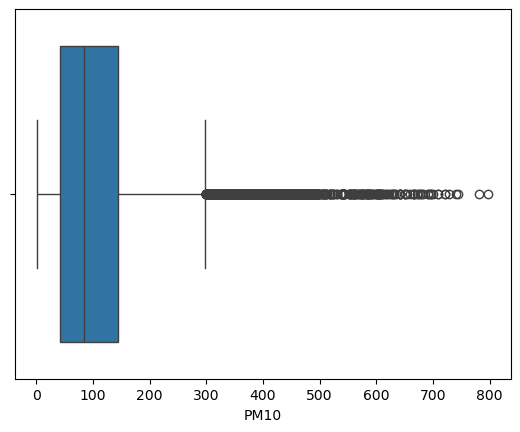

In [15]:
print("max PM10 saat ini: ", tiantan_df['PM10'].max())
sns.boxplot(x=tiantan_df['PM10'])
plt.show()

max SO2 saat ini:  197.0


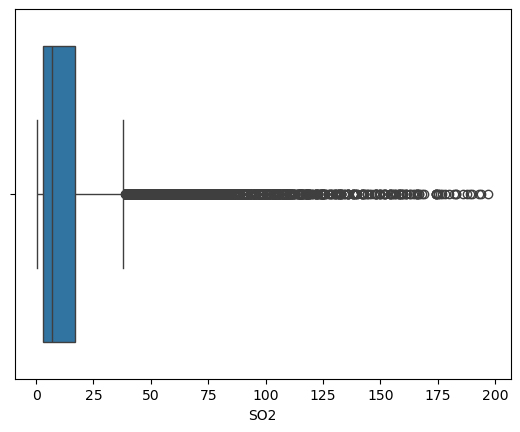

In [18]:
print("max SO2 saat ini: ", tiantan_df['SO2'].max())
sns.boxplot(x=tiantan_df['SO2'])
plt.show()

max O3 saat ini:  378.5


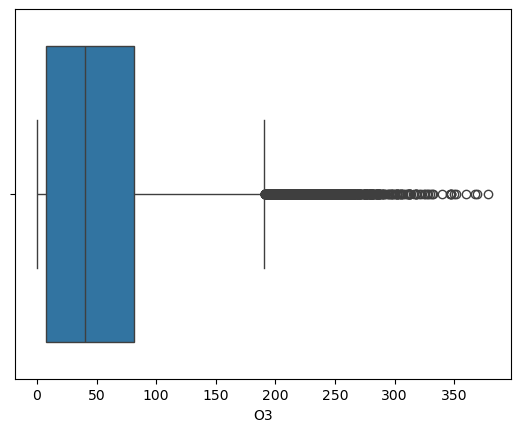

In [22]:
print("max O3 saat ini: ", tiantan_df['O3'].max())
sns.boxplot(x=tiantan_df['O3'])
plt.show()

max RAIN saat ini:  18.3


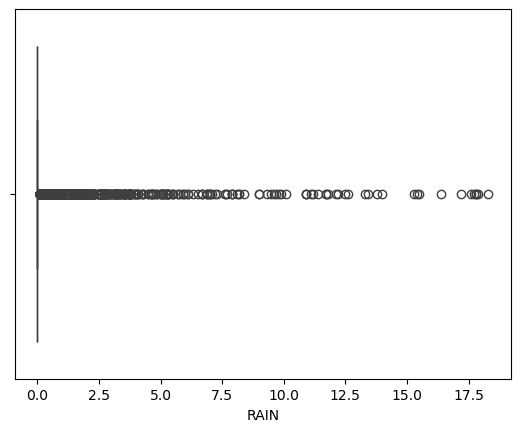

In [31]:
print("max RAIN saat ini: ", tiantan_df['RAIN'].max())
sns.boxplot(x=tiantan_df['RAIN'])
plt.show()

Melakukan pengecekan ulang hasil statistik deskriptif setiap kolom

In [153]:
tiantan_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,81.891727,106.241531,14.460879,53.258828,1305.333262,55.973268,13.668250,1012.551871,2.445126,0.053539,1.860815
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.314448,89.030550,20.030392,32.016282,1179.450046,58.727250,11.459735,10.266471,13.811939,0.551728,1.280427
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.571200,2.000000,100.000000,0.428400,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,41.000000,3.000000,28.000000,518.125000,8.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,85.000000,7.000000,47.000000,900.000000,40.000000,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,113.000000,144.000000,17.000000,71.000000,1600.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,691.000000,797.666667,197.000000,241.000000,10000.000000,378.500000,41.100000,1042.000000,28.800000,18.300000,10.500000


**Insight:**
- Setelah melakukan proses Clening Data dengan melakukan 3 tahap yaitu Define, Code, dan Test dan dilakukan pengecekan ulang menggunakan method describe(), terlihat pada setiap kolom sudah tidak ada data yang mengalami Missing Value, Invalid Value, dan Inaccurate Value.
- Meskipun Outlier tetap ada dalam beberapa kolom, namun Outlier tersebut tidak terlalu jauh dari distribusi data yang ada, sehingga data yang dihasilkan masih dalam pola yang wajar.

## Exploratory Data Analysis (EDA)

### Explore konsentrasi CO disetiap tahunnya

In [13]:
# Menghitung rata-rata konsentrasi CO menggunakan method mean() berdasarkan tahun menggunakan method groupby()
co_per_tahun = tiantan_df.groupby('year')['CO'].mean()
print(co_per_tahun)

year
2013    1311.649714
2014    1338.590183
2015    1302.374429
2016    1196.163479
2017    1762.358757
Name: CO, dtype: float64


### Explore korelasi Polusi dan Cuaca

In [ ]:
# Memilih variabel yang ingin dianalisis korelasinya
co_korelasi = tiantan_df[["CO", "PM2.5", "PM10", "SO2", "NO2", "O3", "TEMP", "PRES", "DEWP", "RAIN", "WSPM"]]

# Menghitung korelasi antar variabel menggunakan method corr()
co_korelasi.corr(numeric_only=True)

,CO,PM2.5,PM10,SO2,NO2,O3,TEMP,PRES,DEWP,RAIN,WSPM
CO,1.000000,0.804796,0.724536,0.406533,0.715271,-0.316662,-0.321220,0.156790,-0.038030,-0.014276,-0.326441
PM2.5,0.804796,1.000000,0.892071,0.391110,0.668873,-0.168211,-0.150523,0.009541,0.114483,-0.024137,-0.292864
PM10,0.724536,0.892071,1.000000,0.380415,0.629220,-0.119781,-0.118317,-0.022186,0.060489,-0.038034,-0.177783
SO2,0.406533,0.391110,0.380415,1.000000,0.413112,-0.053981,-0.235926,0.171997,-0.229571,-0.046399,-0.044417
NO2,0.715271,0.668873,0.629220,0.413112,1.000000,-0.538811,-0.324045,0.186279,-0.082993,-0.050307,-0.412358
O3,-0.316662,-0.168211,-0.119781,-0.053981,-0.538811,1.000000,0.579321,-0.428734,0.277916,0.013060,0.333254
TEMP,-0.321220,-0.150523,-0.118317,-0.235926,-0.324045,0.579321,1.000000,-0.837532,0.819164,0.043081,0.048800
PRES,0.156790,0.009541,-0.022186,0.171997,0.186279,-0.428734,-0.837532,1.000000,-0.770367,-0.072191,0.038617
DEWP,-0.038030,0.114483,0.060489,-0.229571,-0.082993,0.277916,0.819164,-0.770367,1.000000,0.103580,-0.278875
RAIN,-0.014276,-0.024137,-0.038034,-0.046399,-0.050307,0.013060,0.043081,-0.072191,0.103580,1.000000,0.015770


### Explore perbandingan konsentrasi CO dengan PM2.5 tahun 2017

In [147]:
# Filter data hanya untuk tahun 2017
tiantan_2017 = tiantan_df[tiantan_df['year'] == 2017]

# Menghitung rata-rata CO dan PM2.5 per bulan
co_pm2_per_bulan = tiantan_2017.groupby('month')[['CO', 'PM2.5']].mean().reset_index()
print(co_pm2_per_bulan)

   month           CO      PM2.5
0      1  2276.814516  119.59543
1      2  1192.782738   71.78125


### Explore pola musim terhadap polusi 

In [125]:
# Mendefinisikan sebuah kolom baru bernama “season” untuk mengelompokkan temperatur
tiantan_df["season"] = tiantan_df.TEMP.apply(lambda x: "Winter" if x <= 5 else ("Spring" if x < 15  else ("Autumn" if x < 25 else "Summer")))
tiantan_df.groupby(by="season").No.nunique().sort_values(ascending=False)

season
Winter    10358
Autumn    10241
Spring     7465
Summer     7000
Name: No, dtype: int64

In [126]:
# Melihat rata-rata polusi di setiap musim
polusi_season = tiantan_df.groupby('season')[['CO', 'PM2.5', 'PM10', 'SO2', 'NO2', 'O3']].mean().reset_index()
print(polusi_season)

   season           CO      PM2.5        PM10        SO2        NO2  \
0  Autumn  1050.599467  73.018931  100.510834  10.371084  50.053202   
1  Spring  1242.051610  82.794370  108.894230  15.680497  58.949087   
2  Summer   909.907734  68.579039   92.300751   9.159813  35.503756   
3  Winter  1870.027703  99.010560  119.416964  21.207993  64.326268   

           O3  
0   55.781716  
1   34.051284  
2  125.469178  
3   24.996046  


### Explore perbedaan tingkatan polusi berdasakan waktu

In [67]:
# Mendefinisikan sebuah kolom baru bernama “time” untuk mengelompokkan waktu
tiantan_df["time"] = tiantan_df.hour.apply(lambda x: "Pagi" if x <= 10 else ("Siang" if x <= 13  else ("Sore" if x <= 16 else "Malam")))
tiantan_df.groupby(by="time").No.nunique().sort_values(ascending=False)

time
Pagi     16071
Malam    10227
Siang     4383
Sore      4383
Name: No, dtype: int64

In [40]:
# Melihat rata-rata polusi di setiap waktu
polusi_time = tiantan_df.groupby('time')[['CO', 'PM2.5', 'PM10', 'SO2', 'NO2', 'O3']].mean().reset_index()
print(polusi_time)

    time           CO      PM2.5        PM10        SO2        NO2          O3
0  Malam  1263.578840  83.428897  113.779162  13.526985  53.965988   68.639182
1   Pagi  1407.732958  82.784591  103.875526  12.314695  56.374998   29.811502
2  Siang  1247.995382  79.778758  102.746324  20.186054  51.662216   73.800918
3   Sore  1084.632574  77.144127  100.824283  18.784131  41.779443  104.518298


### Explore perbedaan tingkatan polusi berdasakan arah angin

In [41]:
# Melihat rata-rata polusi berdasarkan arah angin
polusi_wd = tiantan_df.groupby('wd')[['CO', 'PM2.5', 'PM10', 'SO2', 'NO2', 'O3']].mean().reset_index()
print(polusi_wd)

     wd           CO       PM2.5        PM10        SO2        NO2          O3
0     E  1780.529172  109.037211  131.015355  16.822574  64.474555   38.948376
1   ENE  1731.027472  102.216857  121.883097  14.642851  65.370228   31.420068
2   ESE  1665.924330  108.372802  131.423712  18.224704  60.466236   53.299064
3     N  1090.282365   62.173455   83.621541  11.299839  50.271895   41.233981
4    NE  1537.240569   89.919160  108.327975  12.792566  62.456465   28.407031
5   NNE  1279.501583   73.057906   92.537298  12.223633  57.328068   34.905815
6   NNW   780.485350   38.382437   65.728820   9.704222  40.282685   50.297835
7    NW   688.947043   35.426535   67.982564   8.317443  36.114050   55.975595
8     S  1231.501637   90.079417  115.781828  18.014434  46.480214   96.123047
9    SE  1446.181544   99.868202  125.064498  18.756574  55.992985   69.697421
10  SSE  1329.247540   97.235996  124.216298  19.493316  50.988327   88.338154
11  SSW  1053.156772   81.344439  106.750616  17.574

**Insight:**
- Konsentrasi karbon monoksida (CO) di Stasiun Tiantan paling tinggi berada pada tahun 2017
- Variabel yang memiliki korelasi atau hubungan dengan karbon monoksida (CO) adalah PM2.5, PM10, SO2, NO2, O3, dan juga PRES. Dan variabel yang memiliki korelasi tertinggi adalah PM2.5
- Pada tahun konsentrasi karbon monoksida (CO) tertinggi yaitu tahun 2017, variabel yang memiliki korelasi tertinggi dengan karbon monoksida (CO) yaitu PM2.5, ikut meningkat disetiap bulannya.
- Perbedaan musim, waktu, dan arah angin dapat mempengaruhi tingkat konsentrasi polusi yaitu CO, PM2.5, PM10, SO2, NO2, dan O3.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tingkat rata-rata konsentrasi karbon monoksida (CO) di Stasiun Tiantan dari tahun 2013 hingga 2017?

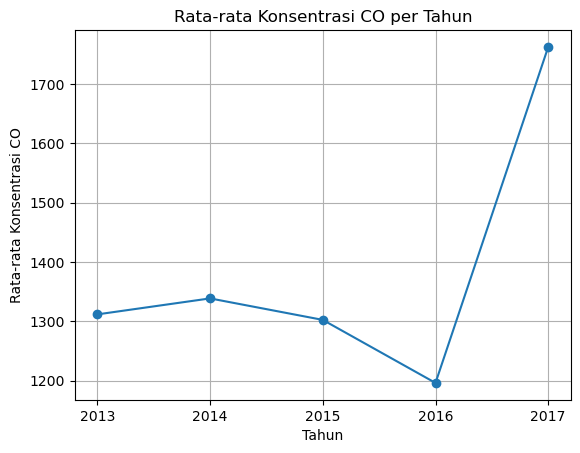

In [ ]:
# Menggunakan variabel co_per_tahun yang sudah dihitung sebelumnya dengan year sebagai index dan nilai rata-rata CO sebagai value
plt.plot(co_per_tahun.index, co_per_tahun.values, marker='o', linestyle='-')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Konsentrasi CO')
plt.title('Rata-rata Konsentrasi CO per Tahun')
plt.xticks(co_per_tahun.index)  
plt.grid(True)
plt.show()

### Pertanyaan 2: Apa saja variabel polusi yang mempengaruhi atau yang memiliki hubungan dengan tingkat konsentrasi karbon monoksida (CO) di Stasiun Tiantan?

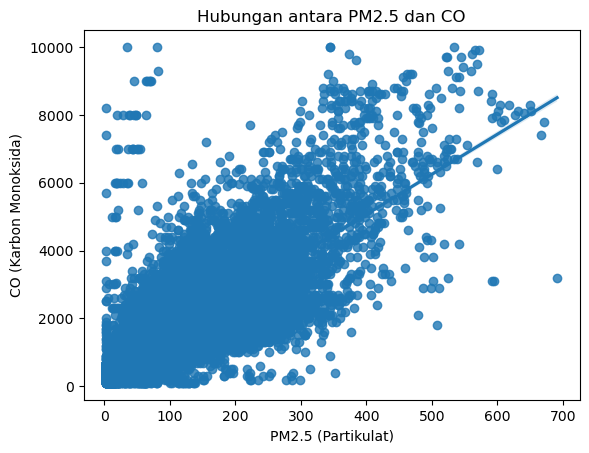

In [54]:
sns.regplot(x='PM2.5', y='CO', data=tiantan_df)
plt.xlabel("PM2.5 (Partikulat)")
plt.ylabel("CO (Karbon Monoksida)")
plt.title("Hubungan antara PM2.5 dan CO")
plt.show()

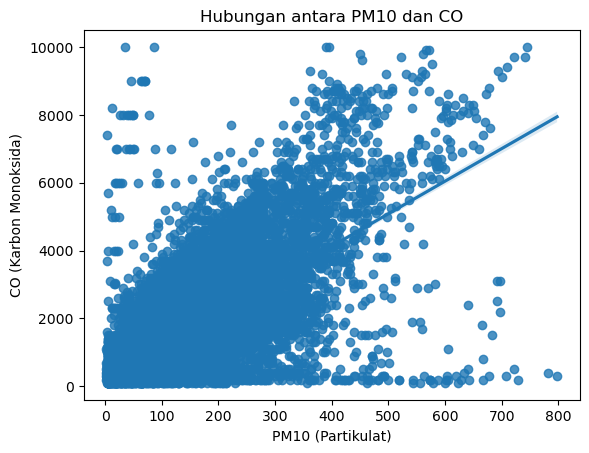

In [56]:
sns.regplot(x='PM10', y='CO', data=tiantan_df)
plt.xlabel("PM10 (Partikulat)")
plt.ylabel("CO (Karbon Monoksida)")
plt.title("Hubungan antara PM10 dan CO")
plt.show()

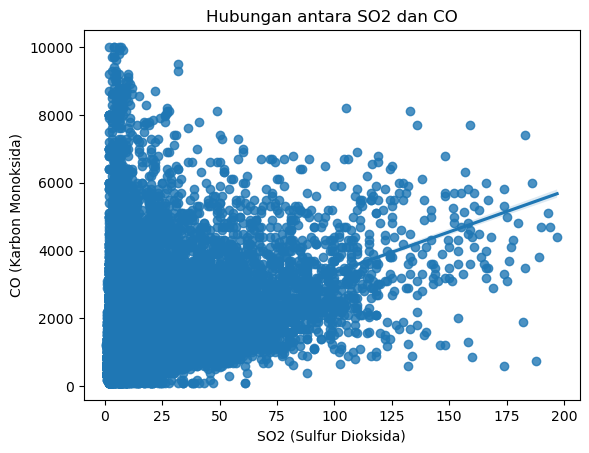

In [57]:
sns.regplot(x='SO2', y='CO', data=tiantan_df)
plt.xlabel("SO2 (Sulfur Dioksida)")
plt.ylabel("CO (Karbon Monoksida)")
plt.title("Hubungan antara SO2 dan CO")
plt.show()

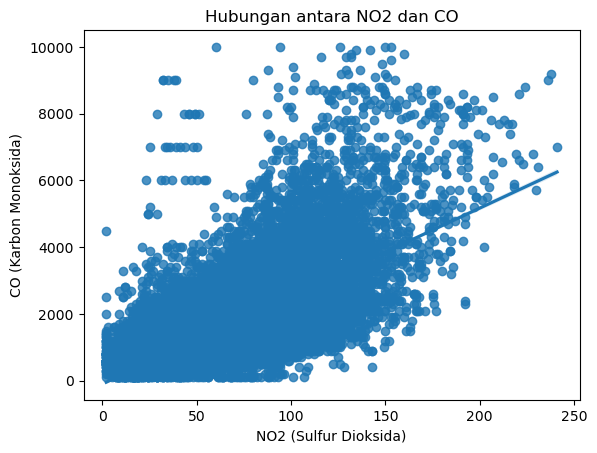

In [58]:
sns.regplot(x='NO2', y='CO', data=tiantan_df)
plt.xlabel("NO2 (Sulfur Dioksida)")
plt.ylabel("CO (Karbon Monoksida)")
plt.title("Hubungan antara NO2 dan CO")
plt.show()

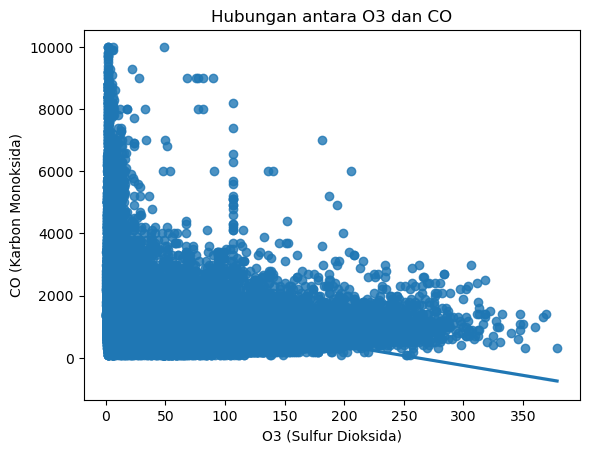

In [59]:
sns.regplot(x='O3', y='CO', data=tiantan_df)
plt.xlabel("O3 (Sulfur Dioksida)")
plt.ylabel("CO (Karbon Monoksida)")
plt.title("Hubungan antara O3 dan CO")
plt.show()

### Pertanyaan 3: Bagimana perbandingan peningkatan konsentrasi karbon monoksida (CO) dengan variabel yang memiliki tingkat korelasi paling tinggi dengan karbon monoksida (CO) disetiap bulannya, pada tahun dimana rata-rata karbon monoksida (CO) mencapai tingkat paling tinggi di Stasiun Tiantan?

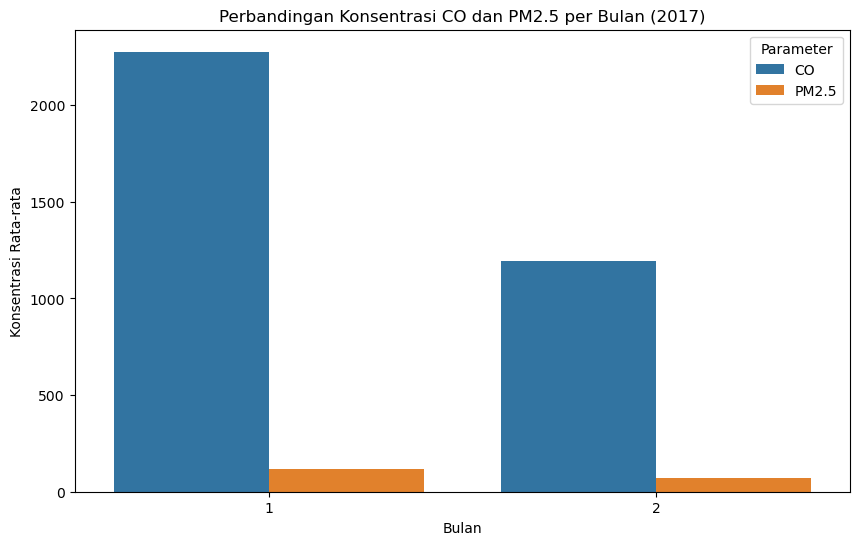

In [152]:
# Ubah bentuk data agar cocok dengan sns.barplot() menggunakan method melt()
co_pm2_per_bulan_long = co_pm2_per_bulan.melt(
    id_vars=["month"], 
    value_vars=["CO", "PM2.5"], 
    var_name="parameter", 
    value_name="konsentrasi"
    )

plt.figure(figsize=(10, 6))
sns.barplot(x="month", y="konsentrasi", hue="parameter", data=co_pm2_per_bulan_long)

plt.xlabel("Bulan")
plt.ylabel("Konsentrasi Rata-rata")
plt.title("Perbandingan Konsentrasi CO dan PM2.5 per Bulan (2017)")
plt.legend(title="Parameter")
plt.show()

### Pertanyaan 4: Apakah faktor cuaca seperti  arah angin dan musim mempengaruhi tingkatan polusi di Stasiun Tiantan dari tahun 2013 hingga 2017?

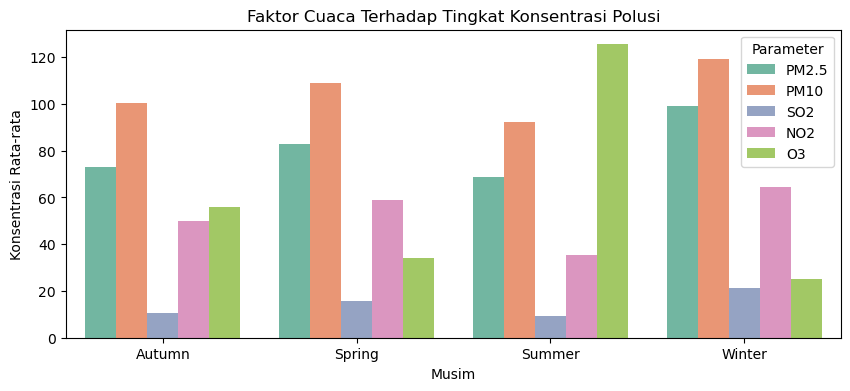

In [ ]:
polusi_season_long = polusi_season.melt(
    id_vars=["season"], 
    value_vars=['PM2.5', 'PM10', 'SO2', 'NO2', 'O3'],   #Tanpa CO agar lebih terlihat perbandingan antar polutan
    var_name="parameter", 
    value_name="konsentrasi"
    )

plt.figure(figsize=(10, 4))
sns.barplot(
    x="season", 
    y="konsentrasi", 
    hue="parameter", 
    data=polusi_season_long, 
    palette="Set2"
    )

plt.xlabel("Musim")
plt.ylabel("Konsentrasi Rata-rata")
plt.title("Faktor Cuaca Terhadap Tingkat Konsentrasi Polusi")
plt.legend(title="Parameter")
plt.show()

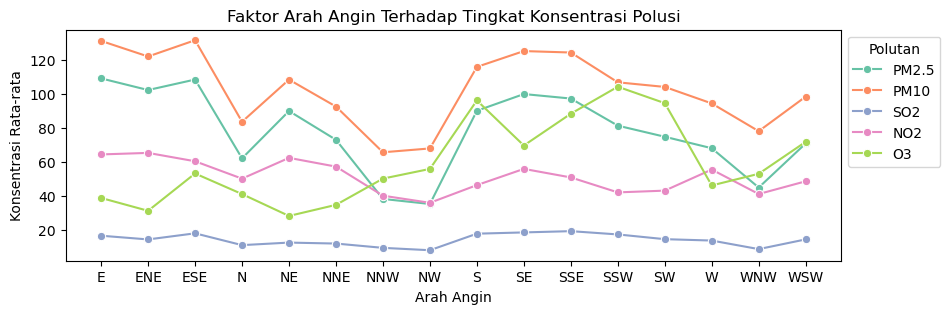

In [ ]:
polusi_wd_long = polusi_wd.melt(
    id_vars=["wd"], 
    value_vars=['PM2.5', 'PM10', 'SO2', 'NO2', 'O3'],   #Tanpa CO agar lebih terlihat perbandingan antar polutan
    var_name="parameter", 
    value_name="konsentrasi"
    )

plt.figure(figsize=(10, 3))
sns.lineplot(
    x="wd", 
    y="konsentrasi", 
    hue="parameter",
    marker="o", 
    data=polusi_wd_long, 
    palette="Set2"
    )

plt.xlabel("Arah Angin")
plt.ylabel("Konsentrasi Rata-rata")
plt.title("Faktor Arah Angin Terhadap Tingkat Konsentrasi Polusi")
plt.legend(title="Polutan", bbox_to_anchor=(1, 1)) # Menempatkan posisi legend diluar grafik agar mudah dibaca
plt.show()

### Pertanyaan 5: Apakah perbedaan waktu mempengaruhi tingkat konsentrasi polusi?

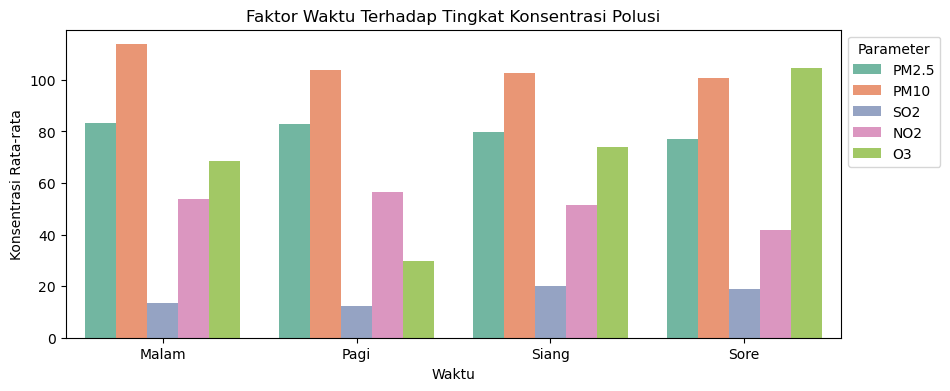

In [120]:
polusi_time_long = polusi_time.melt(
    id_vars=["time"], 
    value_vars=['PM2.5', 'PM10', 'SO2', 'NO2', 'O3'],   #Tanpa CO agar lebih terlihat perbandingan antar polutan
    var_name="parameter", 
    value_name="konsentrasi"
    )

plt.figure(figsize=(10, 4))
sns.barplot(
    x="time", 
    y="konsentrasi", 
    hue="parameter", 
    data=polusi_time_long, 
    palette="Set2"
    )

plt.xlabel("Waktu")
plt.ylabel("Konsentrasi Rata-rata")
plt.title("Faktor Waktu Terhadap Tingkat Konsentrasi Polusi")
plt.legend(title="Parameter", bbox_to_anchor=(1, 1)) # Menempatkan posisi legend diluar grafik agar mudah dibaca
plt.show()

**Insight:**
- Tingkat konsentrasi karbon monoksida (CO) mengalami penurunan dari tahun 2013 hingga 2016, namun pada tahun 2017 konsentrasi karbon monoksida (CO) meningkat drastis, dimana rata-rata konsentrasi konsentrasi karbon monoksida (CO) mencapai hingga 1700 lebih
- Dari hasil scatterplot dari masing-masing variabel polusi diatas, variabel yang memiliki korelasi dengan karbon monoksida (CO) adalah variabel PM2.5, PM10, SO2, dan NO2 dibuktikan dengan nilai positif merepresentasikan korelasi bersesuaian (positive correlation), dan nilai yang paling positif dimiliki oleh variabel PM2.5. Sedangkan variabel dengan nilai negatif merepresentasikan korelasi bersesuaian (negative correlation) adalah O3
- Dilihat dari grafik diatas ketika konsentrasi karbon monoksida (CO) meningkat, konsentrasi PM2.5 juga ikut meningkat, dan juga sebaliknya
- Perbedaan musim dapat mempengaruhi tingkat konsentrasi polusi. Dapat dilihat pada grafik konsentrasi O3 dimusim panas(summer) mengalami peningkatan, sedangkan dimusim dingin(winter) mengalami penurunan
- Variabel Arah Angin juga mempengaruhi tingkat konsentrasi polusi, dimana untuk arah angin SE konsetrasi O3 mengalami penurunan sedangkan konsentrasi polusi lainnya mengalami kenaikan.
- Perbedaan waktu dapat mempengaruhi tingkat konsentrasi polusi. Dapat dilihat pada line chart, konsentrasi O3 dipagi hari mengalami penurunan, sedangkan konsentrasi NO2 mengalami peningkatan.

## Analisis Lanjutan (Opsional)

Sudah dilakukan diatas pada pertanyaan 4 dan 5 dimana menggunakan clustering yaitu pengelompokkan berdasarkan rentang nilai (Binning) dan juga Manual Grouping

## Conclusion

- Konsentrasi karbon monoksida (CO) di Stasiun Tiantan mengalami penurunan bertahap dari tahun 2013 hingga 2016. Namun, pada tahun 2017 terjadi lonjakan signifikan
- Berdasarkan analisis korelasi, beberapa variabel polusi memiliki hubungan erat dengan karbon monoksida (CO), yaitu PM2.5, PM10, SO2, NO2, O3, dan PRES. Dari variabel tersebut, PM2.5 memiliki korelasi paling tinggi dengan CO.
- Pada tahun 2017, di mana CO mencapai tingkat tertinggi, variabel PM2.5 juga mengalami peningkatan setiap bulan. Ini menunjukkan bahwa peningkatan CO sangat dipengaruhi oleh perubahan konsentrasi PM2.5
- Faktor Cuaca seperti musim dan arah angin dapat mempengaruhi tingkat polusi secara signifikan di Stasiun Tiantan
- Perbedaan waktu juga dapat mempengaruhi tingkat polusi di Stasiun Tiantan.

## Donwload semua data

In [155]:
tiantan_df.to_csv("main_data.csv", index=False)